# Example of Building an ABAF from file and run gradual ABA semantics

File in ICCMA format. More info on ICCMA competition: https://www.iccma.org/

Most Modules are adapted from https://github.com/nicopotyka/Uncertainpy/tree/master/src/uncertainpy/gradual (UP)

## Native Gradual ABA Semantics (BSAF approach)

ABAF(Assumptions=[a0,a1,a2,a3,a4,a5,a6,a7], Rules=[r1[0.5]: s8 :- a1, a0, a6.,r2[0.5]: s8 :- a1.,r3[0.5]: s8 :- a5, a1, a3.,r4[0.5]: s8 :- a3, a5.,r5[0.5]: s7 :- a0.,r6[0.5]: s12 :- a3, a6, a5.,r7[0.5]: s12 :- a1, a7, a6, a4, a2.,r8[0.5]: s12 :- a1, a6, s7, a0, a2.,r9[0.5]: s3 :- a4.,r10[0.5]: s3 :- a1.,r11[0.5]: s3 :- a1, a0, a2.,r12[0.5]: s5 :- a3.,r13[0.5]: s5 :- a3, a7, a1, s7, a0.,r14[0.5]: s16 :- s7, a3, a0, a5.,r15[0.5]: s16 :- s7, a5, a7, a2.,r16[0.5]: s16 :- s12, s5.,r17[0.5]: s14 :- a7.,r18[0.5]: s6 :- a5, s16.,r19[0.5]: s6 :- a7, s8, a5, s16, a0.,r20[0.5]: s11 :- s7, s6, a7, a6.,r21[0.5]: s11 :- a5.,r22[0.5]: s11 :- s3, s16.,r23[0.5]: s2 :- a1, s8.,r24[0.5]: s2 :- s12, a4.,r25[0.5]: s2 :- a1, a7, a0, s12.,r26[0.5]: s2 :- a3, s14, s5, a5, a0.,r27[0.5]: s10 :- a3, a0, s12, a4.,r28[0.5]: s10 :- s6, a0.,r29[0.5]: s10 :- a5, s12.,r30[0.5]: s10 :- a3, a7, s14, s16, a4.,r31[0.5]: s10 :- a7.,r32[0.5]: s4 :- s6.,r33[0.5]: s4 :- s16.,r34[0.5]: s0 :- a0, a6.,r35[0.5]: s0 :- s12.,r36[0.

Analysing rules: 100%|██████████| 50/50 [00:00<00:00, 1242.23it/s]


0.32s to build 547 arguments

Support: {a0} -> a0 
Support: {a0,a3,a5} -> a1 
Support: {a0,a2,a3,a4,a5,a6,a7} -> a1 
Support: {a0,a1,a2,a3,a5,a6} -> a1 
Support: {a0,a1,a3,a4,a5,a6,a7} -> a1 
Support: {a0,a1,a2,a4,a5,a6,a7} -> a1 
Support: {a0,a2,a3,a4,a6,a7} -> a1 
Support: {a2,a3,a4,a5,a6,a7} -> a1 
Support: {a0,a3,a5,a6,a7} -> a1 
Support: {a0,a1,a2,a5,a6,a7} -> a1 
Support: {a1} -> a1 
Support: {a1,a2,a4,a5,a6,a7} -> a1 
Support: {a0,a2,a3,a5,a6,a7} -> a1 
Support: {a3,a4,a5,a6,a7} -> a1 
Support: {a0,a1,a3,a5,a7} -> a1 
Support: {a1,a3,a5,a6,a7} -> a1 
Support: {a1,a2,a3,a4,a6,a7} -> a1 
Support: {a0,a1,a2,a3,a5,a7} -> a1 
Support: {a3,a5,a6,a7} -> a1 
Support: {a1,a3,a4,a5,a6,a7} -> a1 
Support: {a1,a2,a3,a4,a5,a6,a7} -> a1 
Support: {a0,a1,a3,a5,a6,a7} -> a1 
Support: {a0,a2,a5,a6,a7} -> a1 
Support: {a0,a2,a3,a5,a6} -> a1 
Support: {a0,a1,a2,a5,a7} -> a1 
Support: {a0,a1,a2,a3,a4,a5,a6,a7} -> a1 
Support: {a2,a3,a5,a6,a7} -> a1 
Support: {a0,a3,a4,a5,a6,a7} -> a1 
Support: {a0,

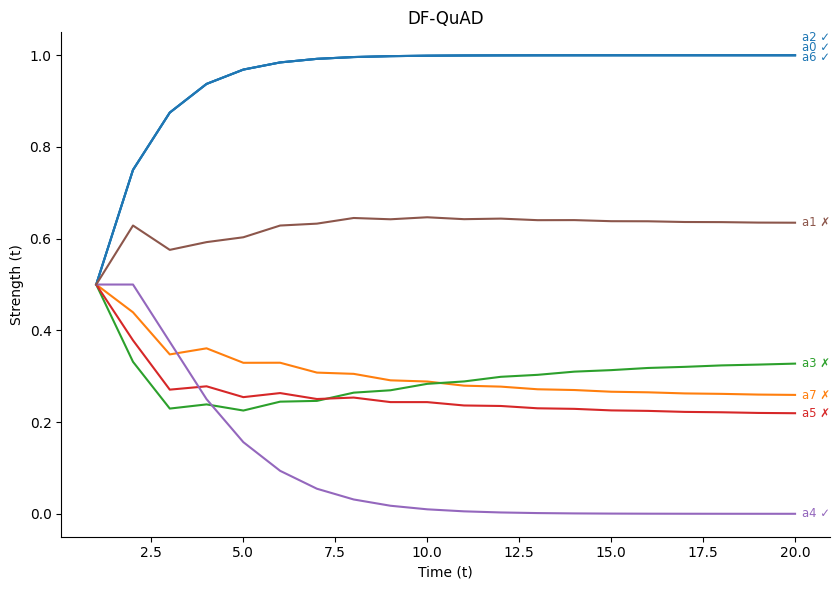

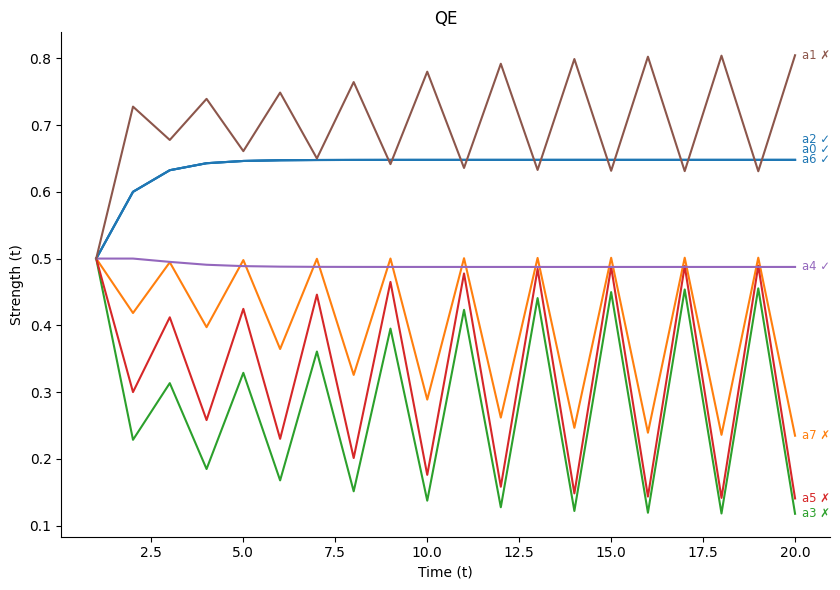

In [1]:
import sys
sys.path.append("../")

from plotting import strengthplot

from ABAF import ABAF
from semantics.bsafDiscreteModular import DiscreteModular
from semantics.modular.LinearInfluence import LinearInfluence
from semantics.modular.ProductAggregation import ProductAggregation
from semantics.modular.SetProductAggregation import SetProductAggregation
from semantics.modular import SumAggregation
from semantics.modular import QuadraticMaximumInfluence

### ----------------------------- Load ABAF from ICCMA example -----------------------------
abaf = ABAF(path=rf"./iccma_style_abafs/non_flat_1_s25_c0.02_n0.2_a0.3_r5_b5_1.aba")

DELTA = 5
EPSILON = 1e-3

print(abaf)

print(f"Number of Assumptions: {len(abaf.assumptions)}")
print(f"Number of Rules: {len(abaf.rules)}")
print(f"Is Flat: {not abaf.non_flat}")

### ----------------------------- Convert ABAF to BSAF -----------------------------
bsaf = abaf.to_bsaf()

print(bsaf)

### ----------------------------- BSAF Df-QuAD Model with SetProductAggregation -----------------------------
model = DiscreteModular(BSAF=bsaf, aggregation=ProductAggregation(),                ## Attack/Support Aggregation (as per UP)
                        influence=LinearInfluence(conservativeness=1),              ## Influence (as per UP)
                        set_aggregation=SetProductAggregation())                    ## Set Attack/Support Aggregation

model.solve(20, generate_plot=True, verbose=False)

strengthplot(model, delta=DELTA, epsilon=EPSILON,
             title="DF-QuAD", wide=10, tall=6)

# check convergence over the last 5 iterations, with ε=1e-3
per_arg = model.has_converged(epsilon=1e-2, last_n=DELTA)
print(per_arg)  
# e.g. {'a0': True, 'a1': False, ...}

if model.is_globally_converged(epsilon=EPSILON, last_n=DELTA):
    print("All assumptions have stabilized in the last 5 steps.")
else:
    print("Some are still oscillating or drifting.")

### ----------------------------- BSAF QE Model with SetProductAggregation -----------------------------
model2 = DiscreteModular(BSAF=bsaf, aggregation=SumAggregation(),                   ## Attack/Support Aggregation (as per UP) 
                        influence=QuadraticMaximumInfluence(conservativeness=1),    ## Influence (as per UP)
                        set_aggregation=SetProductAggregation())                    ## Set Attack/Support Aggregation

model2.solve(20, generate_plot=True, verbose=False)

strengthplot(model2, delta=DELTA, epsilon=EPSILON,
             title="QE", wide=10, tall=6)

# check convergence over the last 5 iterations, with ε=1e-3
per_arg = model2.has_converged(epsilon=EPSILON, last_n=DELTA)
print(per_arg)  
# e.g. {'a0': True, 'a1': False, ...}

if model2.is_globally_converged(epsilon=EPSILON, last_n=DELTA):
    print("All assumptions have stabilized in the last 5 steps.")
else:
    print("Some are still oscillating or drifting.")


## (Q)BAF Baseline

ABAF(Assumptions=[a0,a1,a2,a3,a4,a5,a6,a7], Rules=[r1[0.5]: s8 :- a1, a0, a6.,r2[0.5]: s8 :- a1.,r3[0.5]: s8 :- a5, a1, a3.,r4[0.5]: s8 :- a3, a5.,r5[0.5]: s7 :- a0.,r6[0.5]: s12 :- a3, a6, a5.,r7[0.5]: s12 :- a1, a7, a6, a4, a2.,r8[0.5]: s12 :- a1, a6, s7, a0, a2.,r9[0.5]: s3 :- a4.,r10[0.5]: s3 :- a1.,r11[0.5]: s3 :- a1, a0, a2.,r12[0.5]: s5 :- a3.,r13[0.5]: s5 :- a3, a7, a1, s7, a0.,r14[0.5]: s16 :- s7, a3, a0, a5.,r15[0.5]: s16 :- s7, a5, a7, a2.,r16[0.5]: s16 :- s12, s5.,r17[0.5]: s14 :- a7.,r18[0.5]: s6 :- a5, s16.,r19[0.5]: s6 :- a7, s8, a5, s16, a0.,r20[0.5]: s11 :- s7, s6, a7, a6.,r21[0.5]: s11 :- a5.,r22[0.5]: s11 :- s3, s16.,r23[0.5]: s2 :- a1, s8.,r24[0.5]: s2 :- s12, a4.,r25[0.5]: s2 :- a1, a7, a0, s12.,r26[0.5]: s2 :- a3, s14, s5, a5, a0.,r27[0.5]: s10 :- a3, a0, s12, a4.,r28[0.5]: s10 :- s6, a0.,r29[0.5]: s10 :- a5, s12.,r30[0.5]: s10 :- a3, a7, s14, s16, a4.,r31[0.5]: s10 :- a7.,r32[0.5]: s4 :- s6.,r33[0.5]: s4 :- s16.,r34[0.5]: s0 :- a0, a6.,r35[0.5]: s0 :- s12.,r36[0.

Analysing rules: 100%|██████████| 50/50 [00:00<00:00, 1359.66it/s]


0.29s to build 547 arguments
BAG (path=None)
Arguments: 547 arguments
Attacks: 54265 attacks
Supports: 12960 supports

Discrete modular, iterations:  20 
-------
Aggregation:  ProductAggregation
Influence:  LinearInfluence
Set Aggregation:  SetProductAggregation
-------

iter	a0	a1	a2	a3	a4	a5	a6	a7
0	0.500	0.000	0.500	0.500	0.500	0.500	0.500	0.500
1	0.125	0.000	0.125	0.013	0.125	0.033	0.125	0.072
2	0.383	0.000	0.487	0.016	0.125	0.033	0.383	0.073
3	0.132	0.000	0.484	0.097	0.125	0.096	0.190	0.158
4	0.133	0.000	0.408	0.043	0.156	0.047	0.377	0.092
5	0.175	0.000	0.458	0.049	0.277	0.057	0.376	0.106
6	0.147	0.000	0.452	0.056	0.245	0.056	0.340	0.108
7	0.150	0.000	0.446	0.050	0.240	0.051	0.364	0.102
8	0.154	0.000	0.451	0.053	0.255	0.054	0.361	0.106
9	0.151	0.000	0.449	0.053	0.250	0.053	0.358	0.106
10	0.152	0.000	0.449	0.052	0.250	0.053	0.361	0.105
11	0.152	0.000	0.449	0.052	0.251	0.053	0.360	0.105
12	0.152	0.000	0.449	0.052	0.250	0.053	0.360	0.105
13	0.152	0.000	0.449	0.052	0.251	0.053	0.360	0

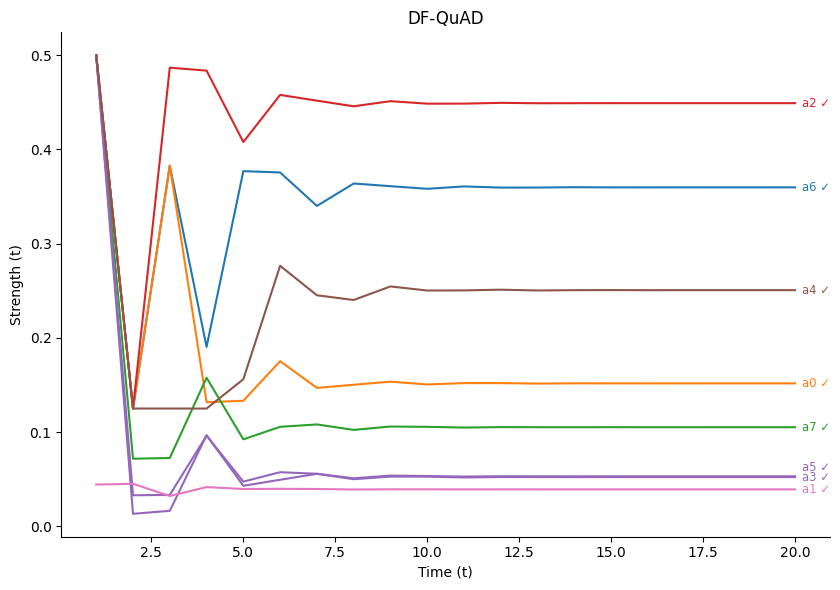

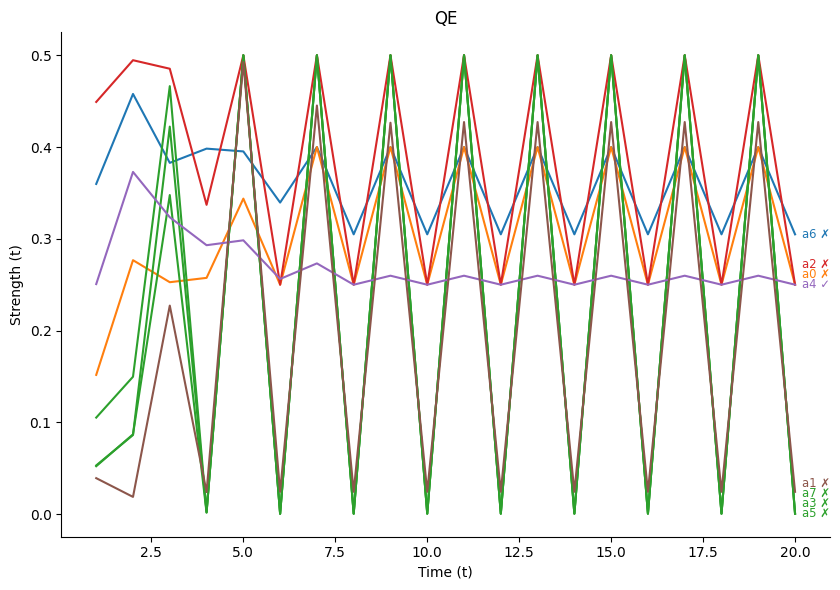

In [2]:
import sys
sys.path.append("../")

from BAG import BAG

from plotting import strengthplot

from ABAF import ABAF
from semantics.DiscreteModularModel import DiscreteModularBAG

from semantics.modular.LinearInfluence import LinearInfluence
from semantics.modular.ProductAggregation import ProductAggregation
from semantics.modular.SetProductAggregation import SetProductAggregation
from semantics.modular import SumAggregation
from semantics.modular import QuadraticMaximumInfluence
from semantics.modular.SetMeanAggregation import SetMeanAggregation


### ----------------------------- Load ABAF from ICCMA example -----------------------------
abaf = ABAF(path=rf"./iccma_style_abafs/non_flat_1_s25_c0.02_n0.2_a0.3_r5_b5_1.aba")

DELTA = 5
EPSILON = 1e-2

print(abaf)

print(f"Number of Assumptions: {len(abaf.assumptions)}")
print(f"Number of Rules: {len(abaf.rules)}")

### ----------------------------- Convert ABAF to BAG (BAF in the paper) -----------------------------
bag = abaf.to_bag()

print(bag)

### ----------------------------- BAF Df-QuAD Model with SetProductAggregation -----------------------------
model = DiscreteModularBAG(bag=bag, aggregation=ProductAggregation(),              ## Attack/Support Aggregation (as per UP)  
                        influence=LinearInfluence(conservativeness=1),             ## Influence (as per UP)
                        set_aggregation=SetProductAggregation())                   ## Set Attack/Support Aggregation

model.solve(20, generate_plot=True, verbose=True, view='Assumptions', 
            assumptions=abaf.assumptions, 
            aggregate_strength_f=SetMeanAggregation())                             ## Assumption Aggregation

strengthplot(model, delta=DELTA, epsilon=EPSILON,
             title="DF-QuAD", wide=10, tall=6)

# check convergence over the last 5 iterations, with ε=1e-3
per_arg = model.has_converged(epsilon=1e-2, last_n=DELTA)
print(per_arg)  
# e.g. {'a0': True, 'a1': False, ...}

if model.is_globally_converged(epsilon=EPSILON, last_n=DELTA):
    print("All assumptions have stabilized in the last 5 steps.")
else:
    print("Some are still oscillating or drifting.")

### ----------------------------- BAF QE Model with SetProductAggregation -----------------------------
model2 = DiscreteModularBAG(bag=bag, aggregation=SumAggregation(),                  ## Attack/Support Aggregation (as per UP)    
                        influence=QuadraticMaximumInfluence(conservativeness=1),    ## Influence (as per UP) 
                        set_aggregation=SetProductAggregation())                    ## Set Attack/Support Aggregation

model2.solve(20, generate_plot=True, verbose=True, view='Assumptions', 
            assumptions=abaf.assumptions, 
            aggregate_strength_f=SetMeanAggregation())                              ## Assumption Aggregation

strengthplot(model2, delta=DELTA, epsilon=EPSILON,
             title="QE", wide=10, tall=6)

# check convergence over the last 5 iterations, with ε=1e-3
per_arg = model2.has_converged(epsilon=EPSILON, last_n=DELTA)
print(per_arg)  
# e.g. {'a0': True, 'a1': False, ...}

if model2.is_globally_converged(epsilon=EPSILON, last_n=DELTA):
    print("All assumptions have stabilized in the last 5 steps.")
else:
    print("Some are still oscillating or drifting.")
